In [1]:
# setup environment 
import cPickle as pickle
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_context("paper")
rc={'xtick.labelsize': 25, 'ytick.labelsize': 25}
sns.set(rc=rc)
sns.set_style('whitegrid')

In [2]:
fname_input = "108fspace.p"
fname = "data_out/results_108fspace_100_100" 

# --------------------------------------------------------------------------------------------------------- #
max_age = 120
thetas = np.linspace(start=1, stop=max_age, num=max_age)

def rmse(predictions, targets):
    return  np.sqrt(((predictions - targets) ** 2).mean()) #/ predictions.mean()


def reconstruct(x, basis, scale):
    return np.dot(x, basis.T) * scale


### Load the prior space

In [3]:
# load the prior_space used
picklein = open(fname_input, 'rb')
data = pickle.load(picklein)
picklein.close()
pZA = data['prior']

### Load result data 

In [144]:
# dictionary to store data read from pickle files 
# containing simulation data.
data_read = {}

# lists to store some convergence points for the RMSE plot.
plot_list = []
rmse_plot = []

In [107]:
# --------------------------------------------------------------------------------------------------------- #
# read the data from pickle files containing results
for index in np.arange(0, 100):
    
    picklein2 = open(fname + "_" + str(index) + ".p", 'rb')
    data = pickle.load(picklein2)
    picklein2.close()
    data_read[index] = data[index]

### Organize the loaded data for boxplots.

In [ ]:
pred_index = 24
num_trials = 100

idx_list0 = [1, 2, 3, 4, 5, 10, 15, 20, 80]
idx_list = [(x*3)*1000 - 510 for x in idx_list0]  #-510

rmse_model_arr = np.empty((len(idx_list), num_trials))
rmse_actual_arr = np.empty((len(idx_list), num_trials))


for index in np.arange(num_trials):
    
    wta_doutp = data_read[index][0]
    cortex1_p = data_read[index][1]
    basis = data_read[index][2]
    scale = data_read[index][3]

    i = 0
    for idx in idx_list:
        wta_output = wta_doutp[idx]
        winner_idx  =  np.argmax(wta_output)

        result = cortex1_p[idx]    
        result = reconstruct(result, basis, scale)

        
        rmse_actual_arr[i, index] = rmse(pZA[winner_idx, :], pZA[pred_index, :])
        rmse_model_arr[i, index] = rmse(result, pZA[pred_index, :])
        i = i+1
        
        """
        if idx == (2*3)*1000 - 510:    
            err = rmse(result, pZA[pred_index, :])
            plot_list.append(result)
            rmse_plot.append(err)
            
            plt.figure()
            plt.plot(thetas, result, 'r')
            plt.plot(thetas, pZA[pred_index, :], 'k')
            plt.show()
        
# --------------------------------------------------------------------------------------------------------- #  
    


### Generate the RMSE plot

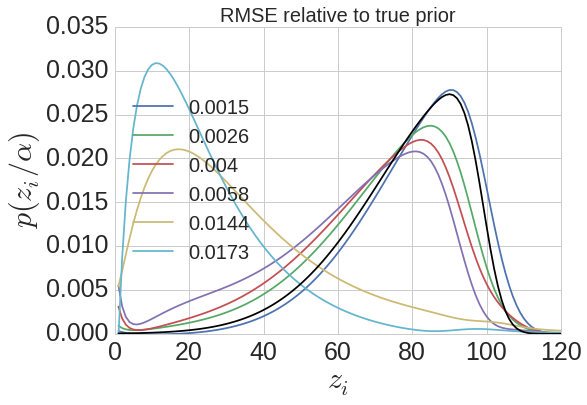

In [248]:
plt.figure()
for j in range(6):
    plt.plot(thetas, pZA[pred_index, :], 'k')
plt.xlabel("$z_i$", fontsize=30)
plt.ylabel(r'$p(z_i/\alpha )$', fontsize=30)
plt.legend(loc="best", fontsize=20)
plt.ylim(0, 0.035)
plt.title("RMSE relative to true prior" , fontsize=20)
plt.savefig('figures/RMSE.pdf', bbox_inches='tight', dpi=300)
plt.show()


### Generate the boxplot

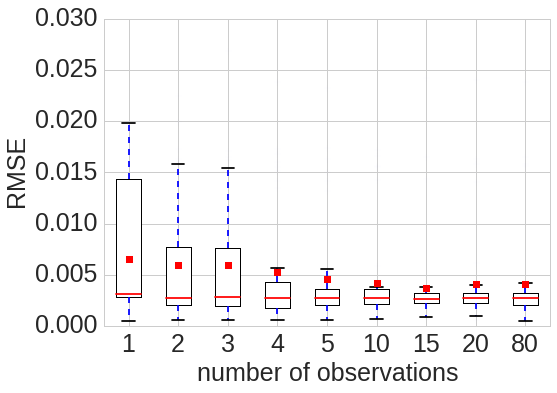

In [246]:
all_data = list(rmse_model_arr)

plt.figure()
bplot1 = plt.boxplot(all_data, showmeans=True, patch_artist=True, labels=idx_list0, showfliers=True)
plt.xlabel("number of observations", fontsize=25)
plt.ylabel("RMSE", fontsize=25)
plt.savefig('figures/gauss108.pdf', bbox_inches='tight', dpi=300)

## Scalability of the neural model

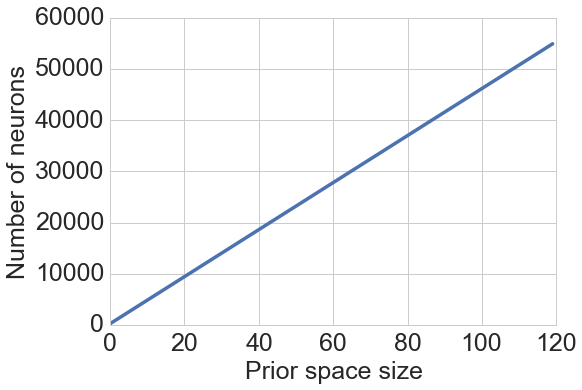

In [2]:
plt.figure()
space_size = range(120) 
num_neurons = [460*size+200 for size in space_size] #350
plt.plot(space_size, num_neurons, linewidth='3.5')
plt.xlabel("Prior space size", fontsize=25)
plt.ylabel("Number of neurons", fontsize=25)
plt.savefig('figures/scaling.pdf', bbox_inches='tight', dpi=1000)
plt.show()

### Plot prior space used

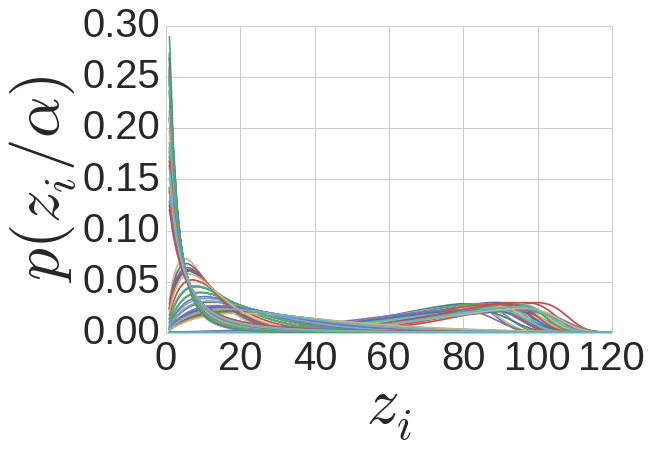

In [214]:
rc={'xtick.labelsize': 40, 'ytick.labelsize': 40}
sns.set(rc=rc)  
sns.set_style('whitegrid')
plt.figure()
plt.plot(thetas, pZA.T)
plt.xlabel("$z_i$", fontsize=65)
plt.ylabel(r'$p(z_i/\alpha )$', fontsize=65)
plt.savefig('figures/prior_full108.pdf', bbox_inches='tight', dpi=1000)
plt.show()